# Stroke Prediction using Machine Learning

This notebook demonstrates a comprehensive analysis of stroke prediction data using classical machine learning models in Python. The entire pipeline is covered, from data preprocessing to model evaluation and visualization.

## Overview

In this analysis, the Stroke Prediction dataset from Kaggle is used to predict whether a patient is likely to have a stroke based on various input parameters such as gender, age, hypertension, heart disease, average glucose level, body mass index (BMI), work type, and smoking status.



# 1. Import libraries
We start by importing the necessary Python libraries such as pandas, matplotlib, seaborn, and scikit-learn modules for preprocessing, training, and evaluation.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score


#2. Data Loading
I'll use the Stroke Prediction dataset, which contains information about patients and whether they had a stroke. The dataset includes features like gender, age, hypertension, heart disease, marital status, work type, residence type, glucose level, BMI, and smoking status.

First, let's download the dataset

In [3]:
# Create data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Check if the dataset exists
if not os.path.exists('/content/healthcare-dataset-stroke-data.csv'):
    print("Please download the stroke dataset from:")
    print("https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset")
else:
    print("Dataset found!")

Dataset found!


In [4]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Drop 'id' column if it exists
if "id" in df.columns:
    df = df.drop(columns=["id"])

df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Understanding the Dataset Features

Let's review what each column in the dataset represents:

1. **id**: Unique identifier
2. **gender**: Male, Female, or Other
3. **age**: Age of the patient
4. **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. **ever_married**: "No" or "Yes"
7. **work_type**: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"
8. **Residence_type**: "Rural" or "Urban"
9. **avg_glucose_level**: Average glucose level in blood
10. **bmi**: Body mass index
11. **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"
12. **stroke**: 1 if the patient had a stroke or 0 if not (target variable)

Now, let's explore the data to understand its characteristics.

In [5]:
# Check for missing values in the dataset
null_counts = []

for col in df.columns:
    null_count = df[col].isnull().sum()
    null_counts.append((col, null_count))

missing_df = pd.DataFrame(null_counts, columns=['Column', 'Null Count'])
missing_df

,Column,Null Count
0,gender,0
1,age,0
2,hypertension,0
3,heart_disease,0
4,ever_married,0
5,work_type,0
6,Residence_type,0
7,avg_glucose_level,0
8,bmi,201
9,smoking_status,0


##3. Exploratory Data Analysis (EDA)
We analyze the dataset before training models:

Target variable distribution:
   stroke  count
0       0   4861
1       1    249


/tmp/ipython-input-3089167361.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stroke', y='count', data=target_counts, palette=['green', 'red'])


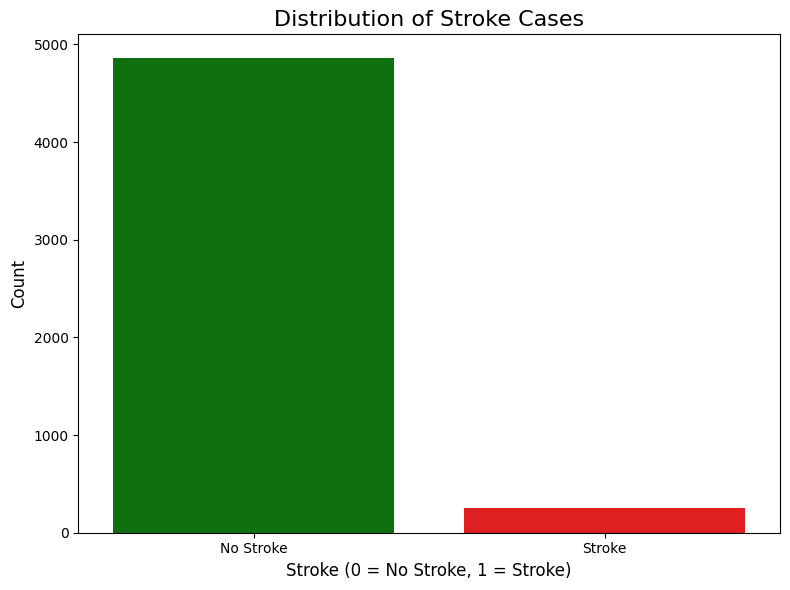

In [6]:
# Distribution of Stroke Cases

# Check the target variable distribution
target_counts = df['stroke'].value_counts().reset_index()
target_counts.columns = ['stroke', 'count']

# Show table with exact numbers
print("Target variable distribution:")
print(target_counts)

# Plot distribution
plt.figure(figsize=(8,6))
sns.barplot(x='stroke', y='count', data=target_counts, palette=['green', 'red'])
plt.title('Distribution of Stroke Cases', fontsize=16)
plt.xlabel('Stroke (0 = No Stroke, 1 = Stroke)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.tight_layout()
plt.show()



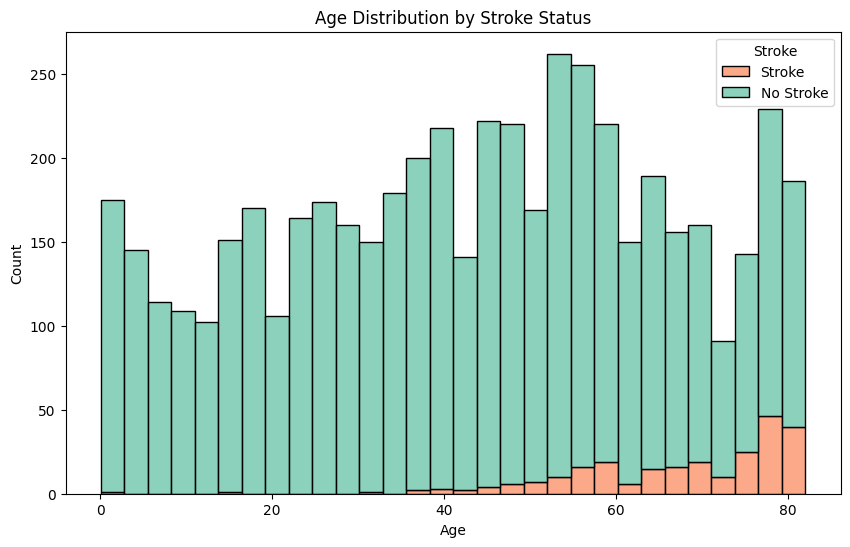

In [7]:
# Visualize age distribution by stroke status
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="age", hue="stroke", multiple="stack", bins=30, palette="Set2")
plt.title("Age Distribution by Stroke Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Stroke", labels=["Stroke", "No Stroke"])
plt.show()


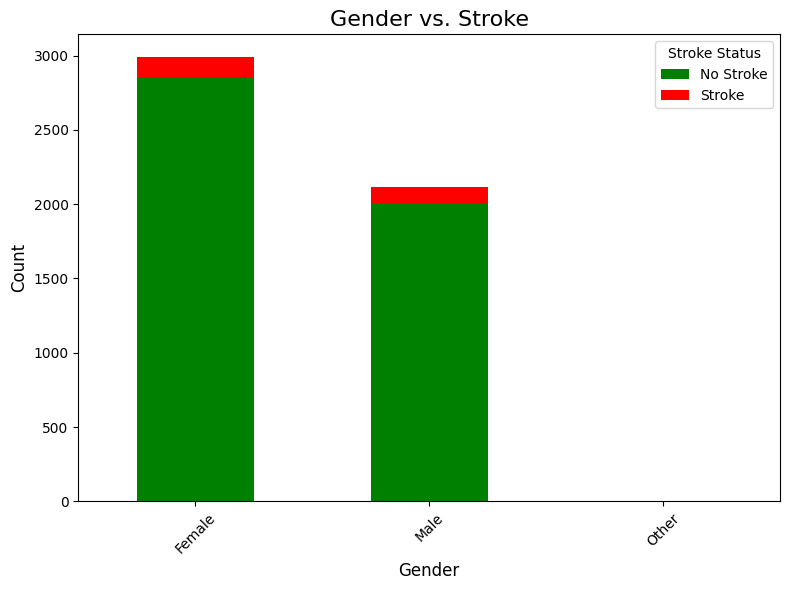

In [8]:
# Visualize gender vs stroke
gender_data = df.groupby(['gender', 'stroke']).size().reset_index(name='count')
gender_pivot = gender_data.pivot(index='gender', columns='stroke', values='count').fillna(0)

gender_pivot.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8,6))
plt.title('Gender vs. Stroke', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['No Stroke', 'Stroke'], title="Stroke Status")
plt.tight_layout()
plt.show()


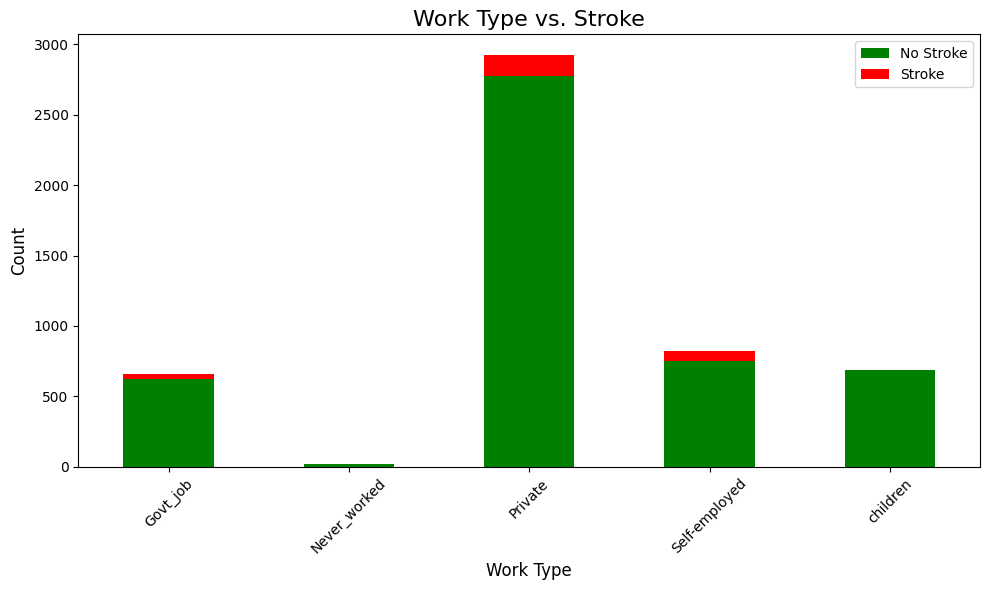

In [9]:
# Visualize work type vs stroke
work_data = df.groupby(['work_type', 'stroke']).size().reset_index(name='count')
work_pivot = work_data.pivot(index='work_type', columns='stroke', values='count').fillna(0)

work_pivot.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10,6))
plt.title('Work Type vs. Stroke', fontsize=16)
plt.xlabel('Work Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['No Stroke', 'Stroke'])
plt.tight_layout()
plt.show()


## 4. Handle Missing Values

In [10]:
# Fill numeric NaN with column mean
for col in df.select_dtypes(include=["float64", "int64"]).columns:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical NaN with mode
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])


## 5. Data Preprocessing

In [11]:
# Encode categorical features
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split features (X) and target (y)
X = df.drop("stroke", axis=1)
y = df["stroke"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 6. Model Training

Now let's train multiple models including Decision Tree, Random Forest, and KNN.

In [12]:
# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}


In [13]:
# Train models and evaluate performance
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-score": f1_score(y_test, y_pred, average="weighted")
    })

# Convert results into a DataFrame
results_df = pd.DataFrame(results)
results_df

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree,0.910959,0.901515,0.910959,0.906044
1,Random Forest,0.938356,0.882294,0.938356,0.909462
2,KNN,0.939335,0.882350,0.939335,0.909951


/tmp/ipython-input-1187474518.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, ax=axes[i], palette="viridis")
/tmp/ipython-input-1187474518.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, ax=axes[i], palette="viridis")
/tmp/ipython-input-1187474518.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, ax=axes[i], palette="viridis")
/tmp/ipython-input-1187474518.py:8: FutureWarning: 

Passing `palette` without assigning `hue`

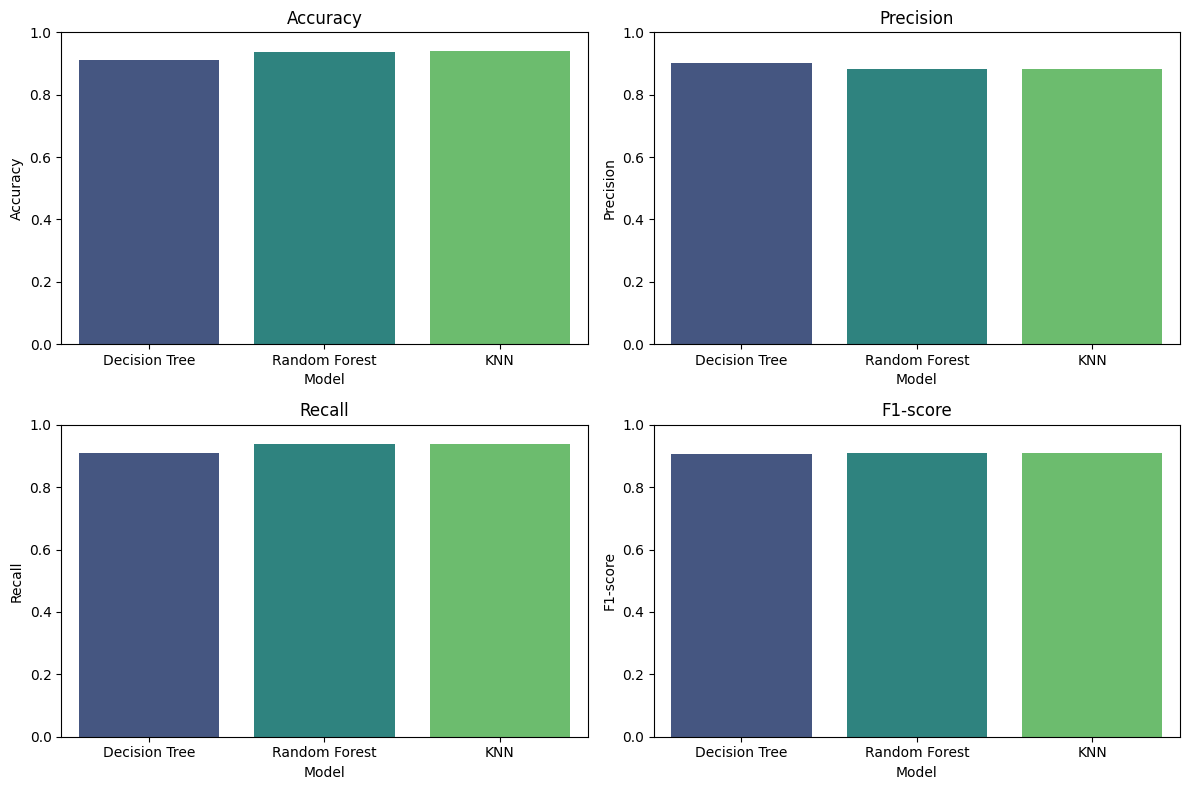

In [14]:
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, metric in enumerate(metrics):
    sns.barplot(x="Model", y=metric, data=results_df, ax=axes[i], palette="viridis")
    axes[i].set_title(metric)
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()


## 8. Model Evaluation
### Confusion Matrices
Now, let's perform a detailed evaluation of our best model on the test set.

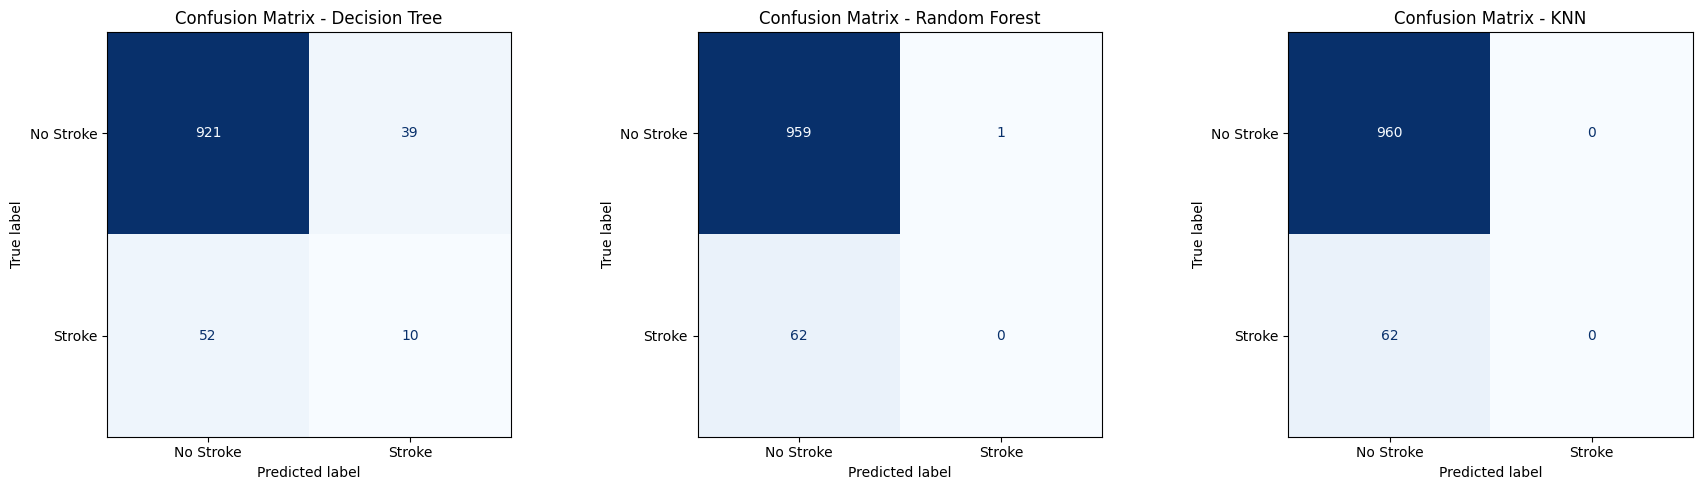

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(models), figsize=(18, 5))  # 1 row, N columns

for ax, (name, model) in zip(axes, models.items()):
    # Make predictions
    y_pred = model.predict(X_test)

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

    # Display each confusion matrix on its subplot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])
    disp.plot(cmap="Blues", values_format='d', ax=ax, colorbar=False)
    ax.set_title(f"Confusion Matrix - {name}")

plt.tight_layout()
plt.show()


Let's also visualize the ROC curve for our final model.

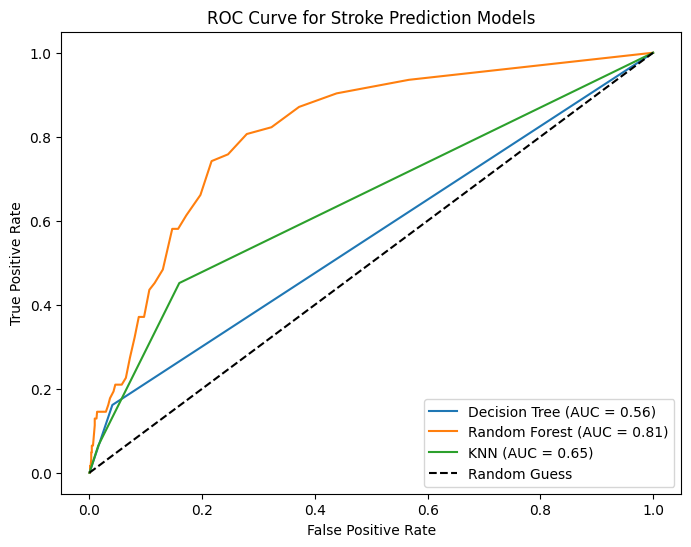

In [17]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Get probabilities of belonging to class 1 (Stroke)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # Some models (e.g., SVM) use decision_function instead
        y_proba = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the model
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot the diagonal line representing random guessing (baseline)
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")

plt.title("ROC Curve for Stroke Prediction Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


## Unsupervised Learning

In [18]:
X = df[["age", "avg_glucose_level", "bmi"]]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data scaled and ready for clustering.")

Data scaled and ready for clustering.


In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to dataset
df["Cluster"] = clusters

df[["avg_glucose_level", "bmi", "Cluster"]].head()


,avg_glucose_level,bmi,Cluster
0,228.69,36.600000,1
1,202.21,28.893237,1
2,105.92,32.500000,0
3,171.23,34.400000,1
4,174.12,24.000000,1


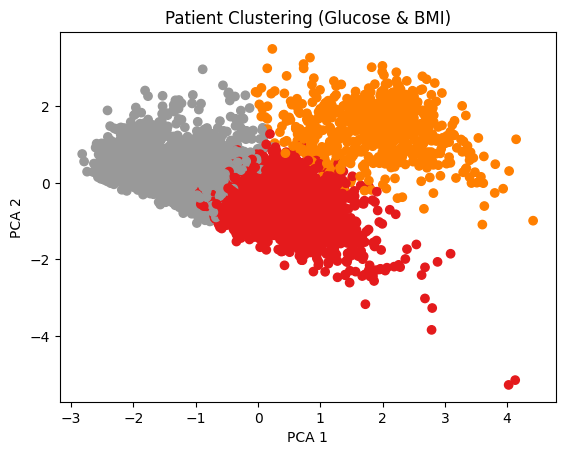

In [ ]:
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="Set1")
plt.title("Patient Clustering (Glucose & BMI)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


##Run DBSCAN with Different Parameters

In [ ]:
#Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_scaled)

In [ ]:
params = [
    {'eps': 0.35, 'min_samples': 5},
    {'eps': 0.4, 'min_samples': 6},
    {'eps': 0.45, 'min_samples': 6},
    {'eps': 0.5, 'min_samples': 8},
]

results = []

# Loop through each parameter set and store clustering results
for p in params:
    db = DBSCAN(eps=p['eps'], min_samples=p['min_samples'])
    labels = db.fit_predict(X_scaled)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    sil = silhouette_score(X_scaled, labels) if n_clusters > 1 else np.nan
    dbi = davies_bouldin_score(X_scaled, labels) if n_clusters > 1 else np.nan

    results.append({
        'params': p,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'silhouette': sil,
        'dbi': dbi,
        'labels': labels
    })

# Display summary for each parameter set
for r in results:
    print(r['params'], "=> clusters:", r['n_clusters'], "noise:", r['n_noise'], "sil:", r['silhouette'])


{'eps': 0.35, 'min_samples': 5} => clusters: 5 noise: 190 sil: 0.23572187382094265
{'eps': 0.4, 'min_samples': 6} => clusters: 4 noise: 147 sil: 0.1148376093571046
{'eps': 0.45, 'min_samples': 6} => clusters: 3 noise: 91 sil: 0.2340105181239682
{'eps': 0.5, 'min_samples': 8} => clusters: 2 noise: 80 sil: 0.40102364763599935


##Visualization

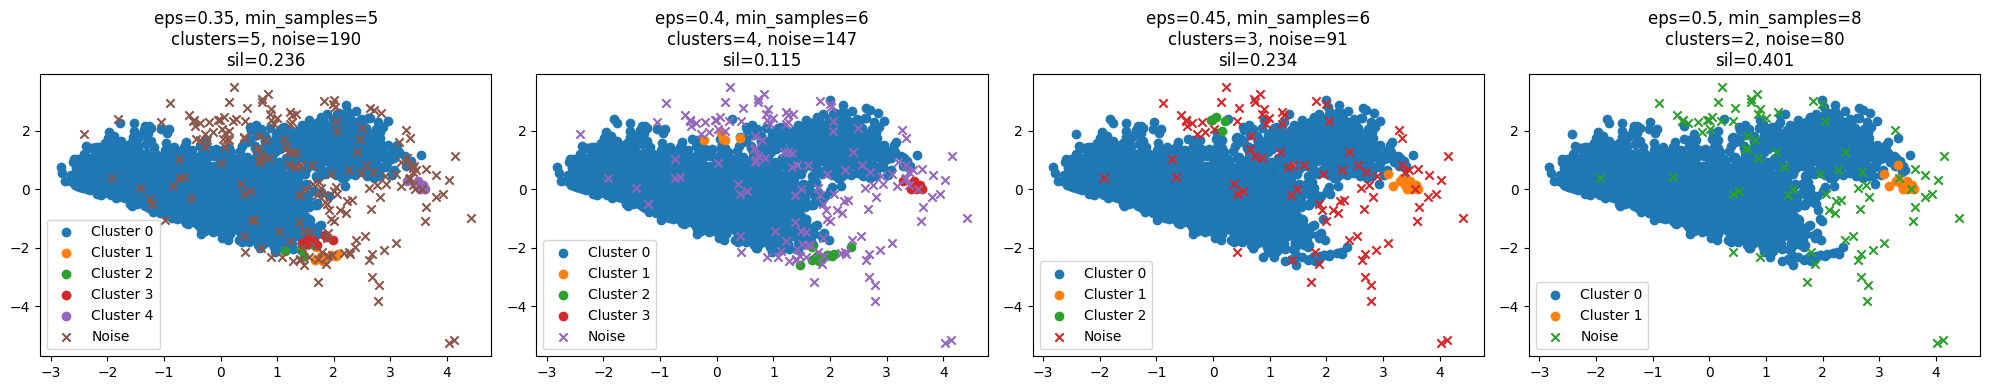

In [ ]:
fig, axes = plt.subplots(1, len(results), figsize=(5*len(results), 4))

for ax, res in zip(axes, results):
    labels = res['labels']
    unique_labels = set(labels)

    # Plot each cluster
    for k in unique_labels:
        class_member_mask = (labels == k)
        xy = X_vis[class_member_mask]

        if k == -1:
            ax.scatter(xy[:, 0], xy[:, 1], marker='x', label='Noise')
        else:
            ax.scatter(xy[:, 0], xy[:, 1], label=f'Cluster {k}')

    # Display parameters and results on each subplot
    ax.set_title(f"eps={res['params']['eps']}, min_samples={res['params']['min_samples']}\n"
                 f"clusters={res['n_clusters']}, noise={res['n_noise']}\n"
                 f"sil={res['silhouette']:.3f}")
    ax.legend()

plt.tight_layout()
plt.show()


## 9. Conclusions

Let's summarize my analysis and findings from the stroke prediction model.

### Summary of Analysis

In this notebook, a complete analysis of stroke prediction was performed using the Kaggle healthcare dataset. Below is a structured summary of the workflow and results.

1. **Data Exploration**:
  - The dataset consisted of health and demographic information such as age, gender, marital status, work type, residence, smoking habits, BMI, and history of diseases.
  - Exploratory visualizations were created to better understand the data. For example, stroke cases were shown to be more frequent among older patients, and distributions across gender and work type were analyzed.
  - The target variable distribution revealed that most patients in the dataset did not experience stroke.

2. **Data Preprocessing**:
  - Missing values in the BMI column were replaced with the mean.
  - Categorical features were encoded into numerical format using Label Encoding.
  - Feature scaling was applied using StandardScaler, which was particularly important for KNN.
  - Finally, the dataset was split into training (80%) and testing (20%) sets.

3. **Model Training and Evaluation**:
  - Three machine learning models were trained: Decision Tree, Random Forest, and K-Nearest Neighbors (KNN).
  - Model performance was evaluated using Accuracy, Precision, Recall, and F1-score.
  - Confusion Matrices and ROC Curves were also generated to better illustrate the prediction patterns of each model.

4. **Results**:
  - The Random Forest classifier achieved the highest overall performance across most evaluation metrics.
  - The Decision Tree performed reasonably well but was less stable compared to Random Forest.
  - The KNN model achieved good accuracy after scaling but was more sensitive to data distribution.

###  Key Insights
1. **Important Predictors**:
  - Age was confirmed as one of the strongest predictors of stroke.
  - Medical conditions such as hypertension and heart disease also played a significant role.
  - Lifestyle factors like smoking showed some influence but less predictive power compared to age and medical history.

2. **Model Performance**:
  - Random Forest consistently outperformed the other models, likely due to its ensemble structure and ability to reduce overfitting.
  - Decision Tree provided interpretability but was less reliable in terms of accuracy.
  - KNN showed competitive results but depended heavily on proper scaling of numerical features.

### Conclusion
This study demonstrates that classical machine learning algorithms can be applied to healthcare data for stroke prediction. Among the models tested, Random Forest provided the best balance of performance across metrics. While the models are not flawless and tend to misclassify rare stroke cases, they show potential as supportive tools in clinical decision-making.

The methodology can be further improved by experimenting with balancing techniques, tuning hyperparameters, and testing additional models. Overall, this project highlights how demographic, medical, and lifestyle data can be leveraged to predict stroke risk using machine learning techniques.